In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
import missingno as mns
import nltk
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re
nltk.download('stopwords')
stop_words = stopwords.words('english')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


<Axes: >

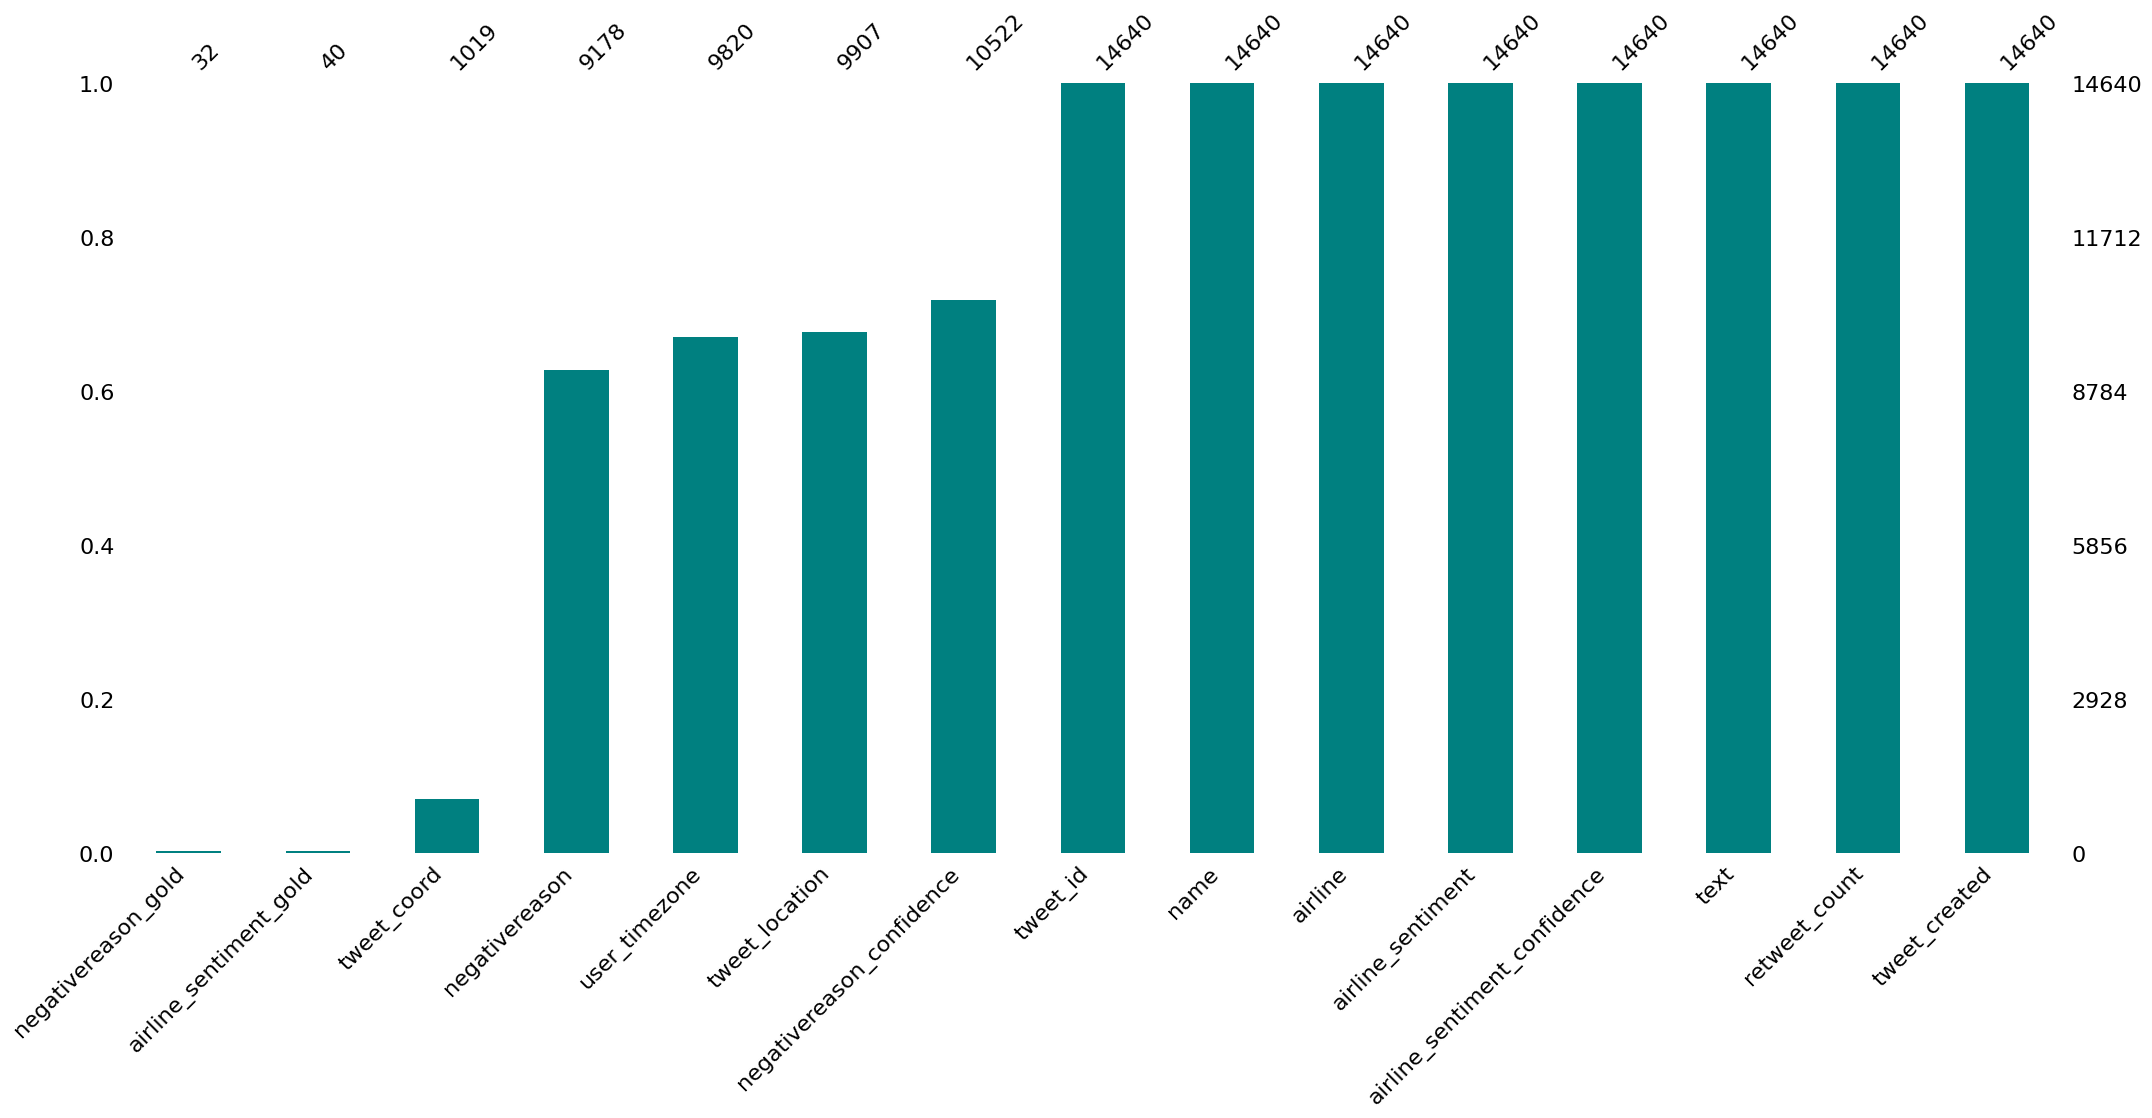

In [3]:
mns.bar(df, color='teal', sort='ascending')

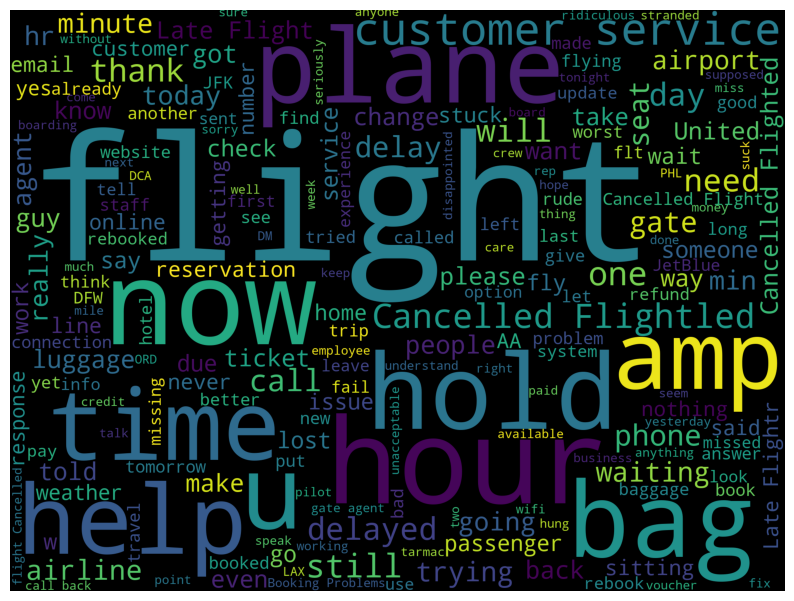

In [4]:
# To check the frequency count of a word
newdata = df[df['airline_sentiment'] == 'negative']
words = ' '.join(newdata['text'])
clean_word = ' '.join([word for word in words.split() if 'http' not in word and not word.startswith ('@') and word != 'RT'])

wc = WordCloud(stopwords=STOPWORDS, background_color='black', width=2000, height=1500).generate(clean_word)
plt.figure(1, figsize=(10,10))
plt.imshow(wc)
plt.axis('off')
plt.show()


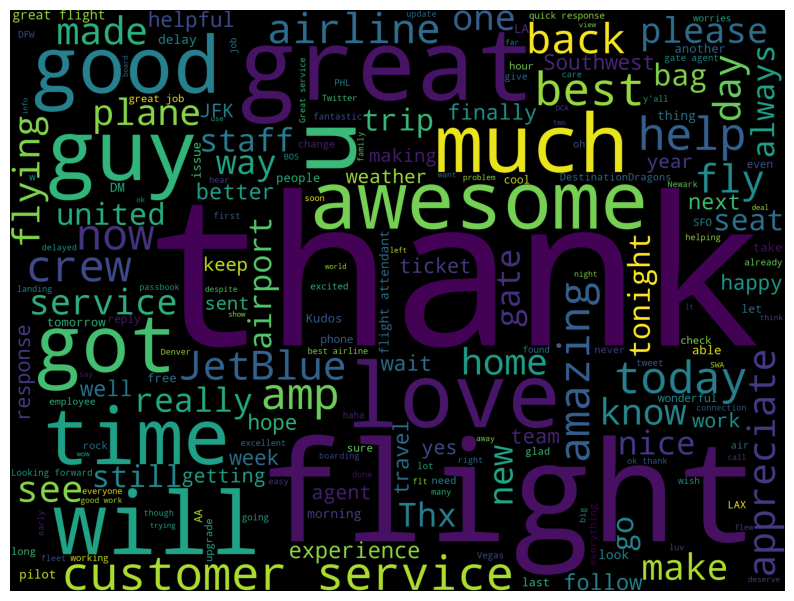

In [5]:
# To check the frequency count of a word
newdata = df[df['airline_sentiment'] == 'positive']
words = ' '.join(newdata['text'])
clean_word = ' '.join([word for word in words.split() if 'http' not in word and not word.startswith ('@') and word != 'RT'])

wc = WordCloud(stopwords=STOPWORDS, background_color='black', width=2000, height=1500).generate(clean_word)
plt.figure(1, figsize=(10,10))
plt.imshow(wc)
plt.axis('off')
plt.show()


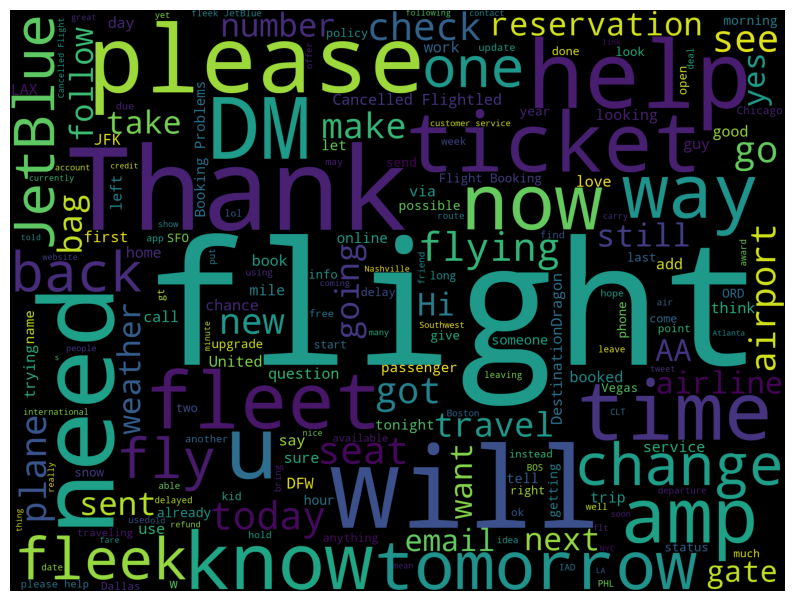

In [6]:
# To check the frequency count of a word
newdata = df[df['airline_sentiment'] == 'neutral']
words = ' '.join(newdata['text'])
clean_word = ' '.join([word for word in words.split() if 'http' not in word and not word.startswith ('@') and word != 'RT'])

wc = WordCloud(stopwords=STOPWORDS, background_color='black', width=2000, height=1500).generate(clean_word)
plt.figure(1, figsize=(10,10))
plt.imshow(wc)
plt.axis('off')
plt.show()


In [7]:
# checking if the class is balanced
df['airline_sentiment'].value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

In [ ]:
# code to balance the classes
from sklearn.utils import resample

df_neg = df[df['airline_sentiment'] == 'negative']
df_pos = df[df['airline_sentiment'] == 'positive']
df_neu = df[df['airline_sentiment'] == 'neutral']
df_pos_samp = resample(df_pos, n_samples=9178)
df_neu_samp = resample(df_neu, n_samples=9178)
df = pd.concat([df_neg, df_pos_samp, df_neu_samp])
df = df.sample(frac=1)
df['airline_sentiment'].value_counts()

airline_sentiment
negative    9178
positive    9178
neutral     9178
Name: count, dtype: int64

In [9]:
#Text Cleaning
text_cleaning_re = "@\S+|https?:S+|http?:\S|[^-Za-z0-9]+"
def preprocess(x, stem = False):
    x = re.sub(text_cleaning_re, " ", str.lower(x)).strip()
    tokens = []
    for token in x.split("\n"):
        if token not in stop_words:
            if stem:
                tokens.append(SnowballStemmer(token))
            else:
                tokens.append(token)
        return " ".join(tokens)
df.text = df.text.apply(lambda x:preprocess(x))
df.text
    

<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:2: SyntaxWarning: invalid escape sequence '\S'
C:\Users\hp\AppData\Local\Temp\ipykernel_6384\4197021879.py:2: SyntaxWarning: invalid escape sequence '\S'
  text_cleaning_re = "@\S+|https?:S+|http?:\S|[^-Za-z0-9]+"


12456    is non existent and i will take this as far as...
14628    thank you americanair jlhalldc customer relati...
13175    that will be the third time i have been called...
11267    got through on the phone usair cancelled fligh...
7481     start including pto in your getaway packages a...
                               ...                        
3856     can you send a personal plane to get us out of...
1402     24 hrs since flight landed and zero info on my...
6773     flying w infant for the 1st time can i bring a...
8993         thank you i will be calling you cheapoairchat
3103                    alright thank you much appreciated
Name: text, Length: 27534, dtype: object

In [10]:
clf1 = Pipeline([('Vectorizer', CountVectorizer()), ('Transformer', TfidfTransformer()), ('Model1', MultinomialNB())])
clf2 = Pipeline([('Vectorizer', CountVectorizer()), ('Transformer', TfidfTransformer()), ('Model1', BernoulliNB())])
clf3 = Pipeline([('Vectorizer', CountVectorizer()), ('Transformer', TfidfTransformer()), ('Model1', MLPClassifier(hidden_layer_sizes=(10,10)))])                               

In [11]:
x = df.text
y = df['airline_sentiment']
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2)

In [12]:
clf1.fit(xtrain, ytrain)

Pipeline(steps=[('Vectorizer', CountVectorizer()),
                ('Transformer', TfidfTransformer()),
                ('Model1', MultinomialNB())])

              precision    recall  f1-score   support

    negative       0.82      0.88      0.85      1869
     neutral       0.85      0.78      0.82      1772
    positive       0.89      0.90      0.90      1866

    accuracy                           0.85      5507
   macro avg       0.85      0.85      0.85      5507
weighted avg       0.85      0.85      0.85      5507



<Axes: >

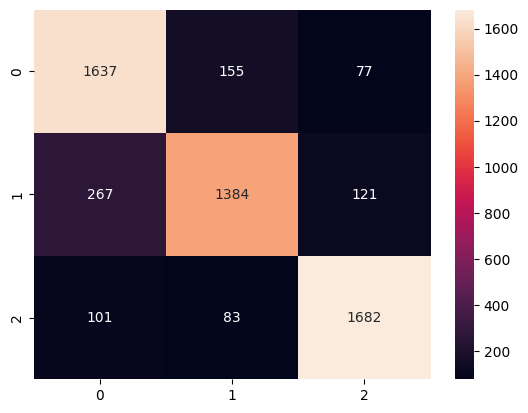

In [13]:
pred1 = clf1.predict(xtest)
print(classification_report(ytest, pred1))
cm = confusion_matrix(ytest, pred1)
sns.heatmap(cm, annot= True, fmt= '0.5g')

In [14]:
clf2.fit(xtrain, ytrain)

Pipeline(steps=[('Vectorizer', CountVectorizer()),
                ('Transformer', TfidfTransformer()),
                ('Model1', BernoulliNB())])

              precision    recall  f1-score   support

    negative       0.85      0.81      0.83      1869
     neutral       0.82      0.79      0.80      1772
    positive       0.85      0.91      0.88      1866

    accuracy                           0.84      5507
   macro avg       0.84      0.84      0.84      5507
weighted avg       0.84      0.84      0.84      5507



<Axes: >

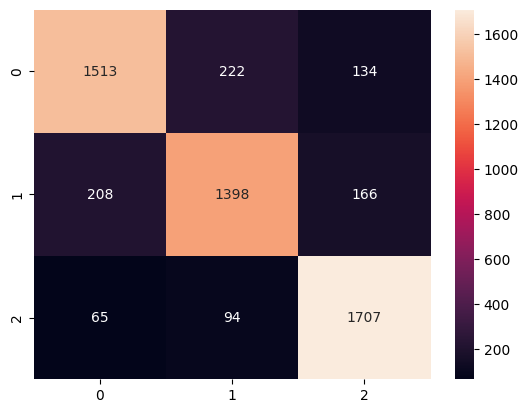

In [15]:
pred2 = clf2.predict(xtest)
print(classification_report(ytest, pred2))
cm = confusion_matrix(ytest, pred2)
sns.heatmap(cm, annot= True, fmt= '0.5g')

In [16]:
clf3.fit(xtrain,ytrain)

Pipeline(steps=[('Vectorizer', CountVectorizer()),
                ('Transformer', TfidfTransformer()),
                ('Model1', MLPClassifier(hidden_layer_sizes=(10, 10)))])

              precision    recall  f1-score   support

    negative       0.95      0.83      0.89      1869
     neutral       0.87      0.95      0.90      1772
    positive       0.94      0.98      0.96      1866

    accuracy                           0.92      5507
   macro avg       0.92      0.92      0.92      5507
weighted avg       0.92      0.92      0.92      5507



<Axes: >

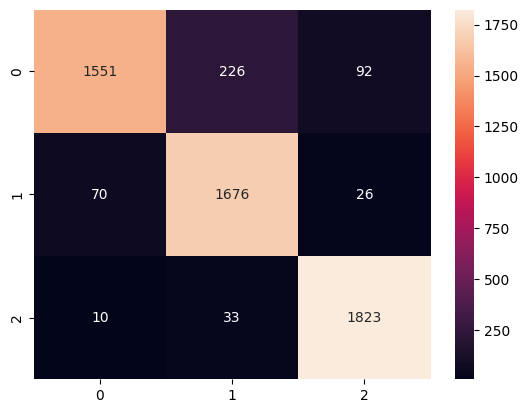

In [17]:
pred3 = clf3.predict(xtest)
print(classification_report(ytest, pred3))
cm = confusion_matrix(ytest, pred3)
sns.heatmap(cm, annot= True, fmt= '0.5g')

conclusion: The third algorithm is 1% better than the other two